# Data I/O 

##### By Andrew Chen

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import random
import time
import seaborn as sns
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
# from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

%matplotlib inline

## Inspect the Data
### Energy, Usage, Inspection, Impact

### Energy

In [19]:
energy_data = pd.read_csv("/Users/chenzhuo/Desktop/Crown/energy_usage_01-2020-09-2020-2.csv")
print(energy_data.head())

       id  battery_id  equipment_id battery_charge_type_txt_id  \
0  155578         128           NaN                        OPC   
1  155579         128           NaN                        OPC   
2  155581         310         772.0                        CHN   
3  155585         310         772.0                        CHN   
4  155589         310         772.0                        CHN   

  eqlz_status_txt_id charge_start_dt  charge_start_dt_tz_id  \
0              NTEQL         06:00.0                    142   
1              NTEQL         59:19.0                    142   
2              NTEQL         18:28.0                    142   
3              NTEQL         21:54.0                    142   
4              NTEQL         18:50.0                    142   

  charge_start_dt_wall charge_end_dt  charge_end_dt_tz_id  ...  \
0              06:00.0       59:02.0                  142  ...   
1              59:19.0       20:19.0                  142  ...   
2              18:28.0    

In [20]:
energy_data.columns

Index(['id', 'battery_id', 'equipment_id', 'battery_charge_type_txt_id',
       'eqlz_status_txt_id', 'charge_start_dt', 'charge_start_dt_tz_id',
       'charge_start_dt_wall', 'charge_end_dt', 'charge_end_dt_tz_id',
       'charge_end_dt_wall', 'charge_amp_hours', 'dischrg_start_dt',
       'dischrg_start_dt_tz_id', 'dischrg_start_dt_wall', 'dischrg_start_bdi',
       'dischrg_start_battery_volts', 'dischrg_end_dt', 'dischrg_end_dt_tz_id',
       'dischrg_end_dt_wall', 'dischrg_end_bdi', 'dischrg_end_battery_volts',
       'dischrg_amp_hours', 'dischrg_work_accum_sec', 'insert_dt'],
      dtype='object')

In [21]:
# Evaluate the null values of numerical columns
print("The columns with null values: \n", energy_data.isnull().sum())
print("-"*10)

The columns with null values: 
 id                                 0
battery_id                         0
equipment_id                   18503
battery_charge_type_txt_id         0
eqlz_status_txt_id                 0
charge_start_dt                    0
charge_start_dt_tz_id              0
charge_start_dt_wall               0
charge_end_dt                      0
charge_end_dt_tz_id                0
charge_end_dt_wall                 0
charge_amp_hours                   0
dischrg_start_dt                   0
dischrg_start_dt_tz_id             0
dischrg_start_dt_wall              0
dischrg_start_bdi                  0
dischrg_start_battery_volts        0
dischrg_end_dt                     0
dischrg_end_dt_tz_id               0
dischrg_end_dt_wall                0
dischrg_end_bdi                    0
dischrg_end_battery_volts          0
dischrg_amp_hours                  0
dischrg_work_accum_sec             0
insert_dt                          0
dtype: int64
----------


In [37]:
energy_df = pd.DataFrame(energy_data)
new_energy = energy_df.drop(['equipment_id', 'battery_charge_type_txt_id', 'eqlz_status_txt_id', 'charge_start_dt', 'charge_start_dt_wall', 'charge_end_dt', 'charge_end_dt_wall', 'dischrg_start_dt', 'dischrg_start_dt_wall', 'dischrg_end_dt', 'dischrg_end_dt_wall', 'insert_dt'], axis = 1)
#new_energy = energy_df[['battery_id', 'charge_start_dt_tz_id', 'charge_end_dt_tz_id', 'charge_amp_hours', 'discharge_start_dt_tz_id', 'discharge_start_bdi', 'discharge_start_battery_volts', 'discharge_end_dt_tz_id', 'discharge_end_bdi', 'discharge_end_battery_volts', 'discharge_amp_hours', 'discharge_work_accum_sec']].copy()
print(new_energy.head())
print(new_energy.columns)

       id  battery_id  charge_start_dt_tz_id  charge_end_dt_tz_id  \
0  155578         128                    142                  142   
1  155579         128                    142                  142   
2  155581         310                    142                  142   
3  155585         310                    142                  142   
4  155589         310                    142                  142   

   charge_amp_hours  dischrg_start_dt_tz_id  dischrg_start_bdi  \
0             401.0                     142                 67   
1             340.0                     142                100   
2             461.0                     142                100   
3              25.7                     142                 97   
4              23.7                     142                100   

   dischrg_start_battery_volts  dischrg_end_dt_tz_id  dischrg_end_bdi  \
0                         53.1                   142               67   
1                         56.0            

#### Explore the Correlation

In [39]:
#### This fucntion referred to "A Data Science Framework: To Achieve 99% Accuracy", credit to the author

def correlation_heatmap(df):
    _, ax = plt.subplots(figsize = (12, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square = True,
        cbar_kws = {'shrink': 0.8},
        ax = ax,
        annot = True,
        linewidths = 0.1, vmax = 1.0, linecolor = 'white', annot_kws = {'fontsize': 12})
    
    plt.title("Pearson Correlation of Features", y = 1.05, size = 15)
    


#### Plot the Correlation Heatmap of the New Dataset of Energy

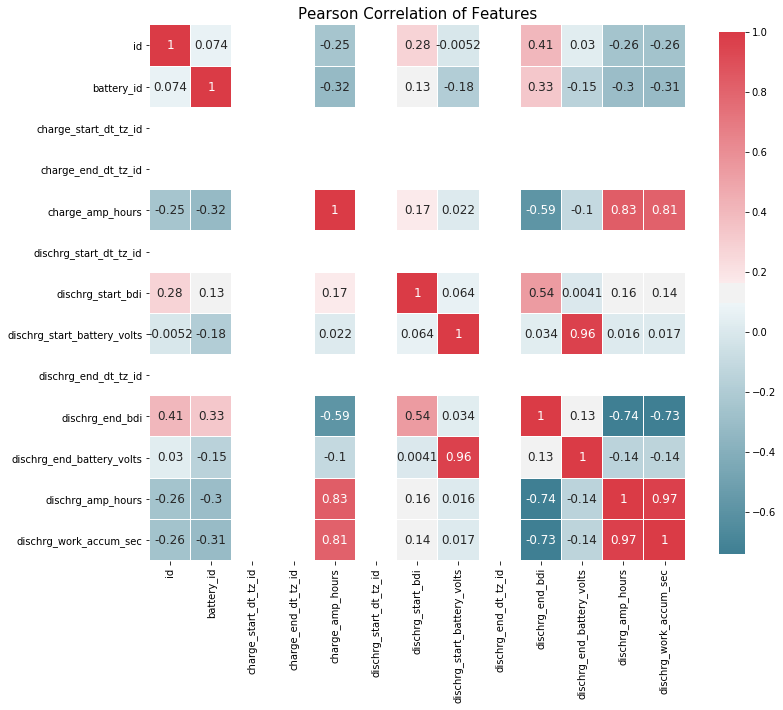

In [40]:
correlation_heatmap(new_energy)

In [ ]:
## Observe the data, id and battery id are initially associated together, so their correlation on the colormap should be omitted
## Besides this, there are comparatively strong relationship between discharge_amp_hours, discharge_work_accum_sec
## Discharge_start_volts and discharge_end_volts
## Also, ther might be relationship between discharge_start_bdi and discharge_end_bdi

### Usage

In [8]:
usage_data = pd.read_csv("/Users/chenzhuo/Desktop/Crown/EquipmentUsageDetail_01-2020-09-2020.csv")
print(usage_data.head())

     'ID Serial No               Location                         Mfg.  \
0  120 F  9A151354  Bunker Hill Warehouse  Crown Equipment Corporation   
1  899 F  10009678  Bunker Hill Warehouse  Crown Equipment Corporation   
2  075 F  1A526198  Bunker Hill Warehouse  Crown Equipment Corporation   
3  512 F  9A230845  Bunker Hill Warehouse  Crown Equipment Corporation   
4  525 F  10064195  Bunker Hill Warehouse  Crown Equipment Corporation   

     Type        Model Reading Date Reading Time Reading Timezone  Hour Meter  \
0      FC    FC4020-50     09/29/20  01:26:27 PM              EDT      1241.4   
1      PR    PR4500-80     09/29/20  11:03:34 AM              EDT       607.6   
2  RM6000  RMD6095S-32     09/29/20  02:30:27 PM              EDT       337.4   
3    WAVE    WAV60-118     09/29/20  10:46:41 AM              EDT        87.9   
4    WAVE    WAV60-118     09/29/20  09:30:09 AM              EDT        84.0   

   Operator Logon  Equipment Idle  Equipment Meter Usage  Equipment 

##### Equipment Idle: the time during which the vehicle was not moving
##### Equipment Travel: the time during which the vehicle was moving
##### Equipment Hydraulic: the time during which the vehicle moving up and down

##### Operator Logon: time during which the operator was active, equal to equipment idle + equipment meter usage

In [14]:
usage_data.columns

Index([''ID', 'Serial No', 'Location', 'Mfg.', 'Type', 'Model', 'Reading Date',
       'Reading Time', 'Reading Timezone', 'Hour Meter', 'Operator Logon',
       'Equipment Idle', 'Equipment Meter Usage', 'Equipment Travel',
       'Equipment Hydraulic'],
      dtype='object')

In [9]:
# Evaluate the null values 
print("The columns with null values: \n", usage_data.isnull().sum())
print("-"*10)

The columns with null values: 
 'ID                      0
Serial No                0
Location                 0
Mfg.                     0
Type                     0
Model                    0
Reading Date             0
Reading Time             0
Reading Timezone         0
Hour Meter               0
Operator Logon           0
Equipment Idle           0
Equipment Meter Usage    0
Equipment Travel         0
Equipment Hydraulic      0
dtype: int64
----------


In [ ]:
## Pretty clean dataset


### Inspection

In [50]:
inspection_data = pd.read_csv("/Users/chenzhuo/Desktop/Crown/EquipmentInspectionDetails_01-2020-09-2020.csv")
print(inspection_data.head())

  Inspected By Equipment Type Equipment ID Serial Number  Inspected Date  \
0         3637             FC        120 F      9A151354           44075   
1         3637             FC        120 F      9A151354           44075   
2         3637             FC        120 F      9A151354           44075   
3         3637             FC        120 F      9A151354           44075   
4         3637             FC        120 F      9A151354           44075   

   Inspected Time Inspected Timezone               Location  Elapsed Time  \
0        0.417315                EDT  Bunker Hill Warehouse       0.00213   
1        0.417315                EDT  Bunker Hill Warehouse       0.00213   
2        0.417315                EDT  Bunker Hill Warehouse       0.00213   
3        0.417315                EDT  Bunker Hill Warehouse       0.00213   
4        0.417315                EDT  Bunker Hill Warehouse       0.00213   

              Result  Questions Failed Generated Lock         Type  No.  \
0  In

In [12]:
inspection_data.columns

Index(['Inspected By', 'Equipment Type', 'Equipment ID', 'Serial Number',
       'Inspected Date', 'Inspected Time', 'Inspected Timezone', 'Location',
       'Elapsed Time', 'Result', 'Questions Failed', 'Generated Lock', 'Type',
       'No.', 'Question', 'Expected Answer', 'Answer Received', 'Pass / Fail'],
      dtype='object')

In [11]:
# Evaluate the null values 
print("The columns with null values: \n", inspection_data.isnull().sum())
print("-"*10)

The columns with null values: 
 Inspected By          2472
Equipment Type           0
Equipment ID             0
Serial Number            0
Inspected Date           0
Inspected Time           0
Inspected Timezone       0
Location                 0
Elapsed Time             0
Result                   0
Questions Failed         0
Generated Lock        4970
Type                     0
No.                      0
Question                 0
Expected Answer          0
Answer Received          0
Pass / Fail           4970
dtype: int64
----------


##### Note:
##### The X and Y mean the directions of the truck

### Impact 

In [70]:
impact_data = pd.read_csv("/Users/chenzhuo/Desktop/Crown/EquipmentImpacts_01-2020-09-2020.csv")
print(impact_data.head())

      ID Serial No Equipment Type               Location Employee No.  \
0  899 F  10009678             PR  Bunker Hill Warehouse         3637   
1  179 F  1A544983         RC5500                 Celina        17560   
2  052 F  1A446908         RM6000                 Celina        27623   
3  150 F  9A229806             SC                 Celina        56045   
4  150 F  9A229806             SC                 Celina          680   

  Impact Date  Impact Time Impact Timezone            AP  Type  ...  \
0    9/9/2020  10:51:07 AM             EDT        *BU 01  High  ...   
1   9/14/2020   7:30:34 AM             EDT  Out of Range  High  ...   
2   9/12/2020   4:00:31 AM             EDT  AC4A679C04E0   Low  ...   
3   9/10/2020   5:14:03 PM             EDT  00A742B5A4FC  High  ...   
4    9/4/2020  12:09:21 PM             EDT     *CEL SS70  High  ...   

   Impulse Threshold  Impulse Captured  Locked  Lock Cleared Date  \
0               20.0              59.0     NaN                NaN

In [71]:
impact_data.columns

Index(['ID', 'Serial No', 'Equipment Type', 'Location', 'Employee No.',
       'Impact Date', 'Impact Time', 'Impact Timezone', 'AP', 'Type',
       'X-Axis Threshold', 'X-Axis Captured', 'Y-Axis Threshold',
       'Y-Axis Captured', 'Impulse Threshold', 'Impulse Captured', 'Locked',
       'Lock Cleared Date', 'Lock Cleared Time', 'Lock Cleared Timezone',
       'Acknowledged Date', 'Acknowledged Time', 'Acknowledged Timezone',
       'Comments'],
      dtype='object')

In [72]:
# Evaluate the null values of numerical columns
print("The columns with null values: \n", impact_data.isnull().sum())
print("-"*10)

The columns with null values: 
 ID                           0
Serial No                    0
Equipment Type               0
Location                     0
Employee No.                 3
Impact Date                  0
Impact Time                  0
Impact Timezone              0
AP                          24
Type                         0
X-Axis Threshold             0
X-Axis Captured              0
Y-Axis Threshold             0
Y-Axis Captured              0
Impulse Threshold         2566
Impulse Captured          2566
Locked                   15688
Lock Cleared Date        15688
Lock Cleared Time        15688
Lock Cleared Timezone    15688
Acknowledged Date          742
Acknowledged Time          742
Acknowledged Timezone      742
Comments                   742
dtype: int64
----------


In [73]:
impact_df = pd.DataFrame(impact_data)
print(impact_df.head())
print(impact_df.columns)


      ID Serial No Equipment Type               Location Employee No.  \
0  899 F  10009678             PR  Bunker Hill Warehouse         3637   
1  179 F  1A544983         RC5500                 Celina        17560   
2  052 F  1A446908         RM6000                 Celina        27623   
3  150 F  9A229806             SC                 Celina        56045   
4  150 F  9A229806             SC                 Celina          680   

  Impact Date  Impact Time Impact Timezone            AP  Type  ...  \
0    9/9/2020  10:51:07 AM             EDT        *BU 01  High  ...   
1   9/14/2020   7:30:34 AM             EDT  Out of Range  High  ...   
2   9/12/2020   4:00:31 AM             EDT  AC4A679C04E0   Low  ...   
3   9/10/2020   5:14:03 PM             EDT  00A742B5A4FC  High  ...   
4    9/4/2020  12:09:21 PM             EDT     *CEL SS70  High  ...   

   Impulse Threshold  Impulse Captured  Locked  Lock Cleared Date  \
0               20.0              59.0     NaN                NaN

In [74]:
print(impact_df.describe)

<bound method NDFrame.describe of           ID Serial No Equipment Type               Location Employee No.  \
0      899 F  10009678             PR  Bunker Hill Warehouse         3637   
1      179 F  1A544983         RC5500                 Celina        17560   
2      052 F  1A446908         RM6000                 Celina        27623   
3      150 F  9A229806             SC                 Celina        56045   
4      150 F  9A229806             SC                 Celina          680   
...      ...       ...            ...                    ...          ...   
16093  659 I  7A292659             WP                   Troy        24814   
16094  827 I  7A259017             WP                   Troy         2761   
16095  838 I  7A275443             WP                   Troy        24128   
16096  963 I  7A272819             WP                   Troy        17341   
16097  963 I  7A272819             WP                   Troy         2761   

      Impact Date  Impact Time Impact Tim

In [79]:
print(impact_df['Location'].head)

#print(impact_df['Location'].unique)

<bound method NDFrame.head of 0        Bunker Hill Warehouse
1                       Celina
2                       Celina
3                       Celina
4                       Celina
                 ...          
16093                     Troy
16094                     Troy
16095                     Troy
16096                     Troy
16097                     Troy
Name: Location, Length: 16098, dtype: object>
<bound method IndexOpsMixin.nunique of 0            PR
1        RC5500
2        RM6000
3            SC
4            SC
          ...  
16093        WP
16094        WP
16095        WP
16096        WP
16097        WP
Name: Equipment Type, Length: 16098, dtype: object>


In [83]:
impact_df['EType_Cat'] = impact_df['Equipment Type'].astype('category')
impact_df['EType_Cat'] = impact_df['EType_Cat'].cat.codes
print(impact_df.head())


      ID Serial No Equipment Type               Location Employee No.  \
0  899 F  10009678             PR  Bunker Hill Warehouse         3637   
1  179 F  1A544983         RC5500                 Celina        17560   
2  052 F  1A446908         RM6000                 Celina        27623   
3  150 F  9A229806             SC                 Celina        56045   
4  150 F  9A229806             SC                 Celina          680   

  Impact Date  Impact Time Impact Timezone            AP  Type  ...  \
0    9/9/2020  10:51:07 AM             EDT        *BU 01  High  ...   
1   9/14/2020   7:30:34 AM             EDT  Out of Range  High  ...   
2   9/12/2020   4:00:31 AM             EDT  AC4A679C04E0   Low  ...   
3   9/10/2020   5:14:03 PM             EDT  00A742B5A4FC  High  ...   
4    9/4/2020  12:09:21 PM             EDT     *CEL SS70  High  ...   

   Impulse Captured  Locked  Lock Cleared Date  Lock Cleared Time  \
0              59.0     NaN                NaN                NaN

In [84]:
print(impact_df['EType_Cat'].nunique)

<bound method IndexOpsMixin.nunique of 0         6
1         9
2        10
3        12
4        12
         ..
16093    21
16094    21
16095    21
16096    21
16097    21
Name: EType_Cat, Length: 16098, dtype: int8>


In [85]:
impact_df['Type'] = impact_df['Type'].astype('category')
impact_df['Type_Cat'] = impact_df['Type'].cat.codes
print(impact_df.head())

      ID Serial No Equipment Type               Location Employee No.  \
0  899 F  10009678             PR  Bunker Hill Warehouse         3637   
1  179 F  1A544983         RC5500                 Celina        17560   
2  052 F  1A446908         RM6000                 Celina        27623   
3  150 F  9A229806             SC                 Celina        56045   
4  150 F  9A229806             SC                 Celina          680   

  Impact Date  Impact Time Impact Timezone            AP  Type  ...  Locked  \
0    9/9/2020  10:51:07 AM             EDT        *BU 01  High  ...     NaN   
1   9/14/2020   7:30:34 AM             EDT  Out of Range  High  ...     NaN   
2   9/12/2020   4:00:31 AM             EDT  AC4A679C04E0   Low  ...     NaN   
3   9/10/2020   5:14:03 PM             EDT  00A742B5A4FC  High  ...     NaN   
4    9/4/2020  12:09:21 PM             EDT     *CEL SS70  High  ...     NaN   

   Lock Cleared Date  Lock Cleared Time  Lock Cleared Timezone  \
0                NaN

In [86]:
drop_columns = ['ID','Serial No', 'Equipment Type', 'Location', 'Employee No.',
       'Impact Date', 'Impact Time', 'Impact Timezone', 'AP','Locked',
       'Lock Cleared Date', 'Lock Cleared Time', 'Lock Cleared Timezone',
       'Acknowledged Date', 'Acknowledged Time', 'Acknowledged Timezone',
       'Comments']
impact_df.drop(drop_columns, axis = 1, inplace = True)

In [87]:
type_size = impact_df['Type'].size
print(type_size)

16098


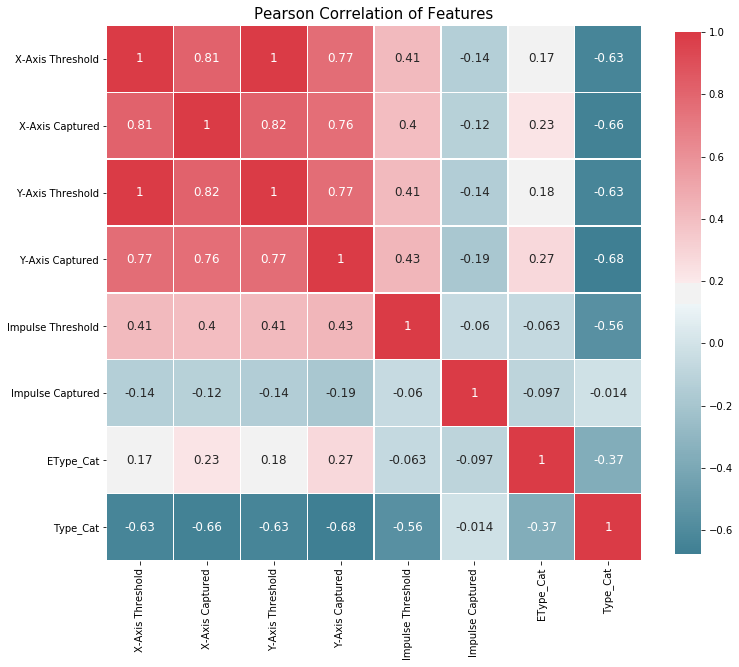

In [88]:
correlation_heatmap(impact_df)